In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# importing data
df = pd.read_csv('ex1data1.txt', header = None)

In [5]:
# view data
df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


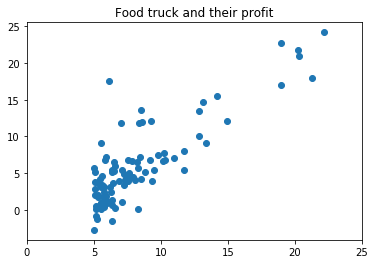

In [25]:
# Visualising the data
plt.scatter(df[0], df[1])
plt.xticks(np.arange(0, 30, 5))
plt.yticks(np.arange(0, 30, 5))
plt.title("Food truck and their profit")
plt.show()

In [44]:
# Compute cost function for linear regression
def computeCost(X, y, theta):
    
    #get numer of trainig example and number features
    m, n = X.shape
    
    # add the bias value(1) to the X
    X = np.hstack((np.ones((m,1)), X))
    
    # Compute the cost
    predictions = X@theta
    error = sum((predictions-y)**2)
    J = (1/(2*m))*error
    
    # Compute grad
    grad = (1/m) * (X.T @ (predictions-y))
    
    return J, grad
    

In [45]:
X = df.iloc[:,0:1].values
y = df.iloc[:,1:2].values
theta = np.zeros((X.shape[1]+1, 1))

J, grad = computeCost(X, y, theta);
print('Cost J: ',J)
print('grad value: ', grad)

Cost J:  [32.07273388]
grad value:  [[ -5.83913505]
 [-65.32884975]]


In [46]:
# Copute gradien descent
def gradientDescent(X, y, alpha, number_iterations):
    
    m, n = X.shape
    j_history = []
    
    # add the bias value(1) to the X
    #X = np.hstack((np.ones((m,1)), X))
    
    # initiaze the theta
    theta = np.zeros((n+1, 1))
    
    
    #Compute gradient descent
    for i in range(number_iterations):
    
        J, grad = computeCost(X, y, theta)
        
        # comput gradient descent
        
        theta = theta - (alpha * grad)
        j_history.append(J)
    
    return j_history, theta
        

In [47]:
j_history, theta_final = gradientDescent(X, y, alpha = 0.01, number_iterations=1500)
print('Cost function j_history size: ', np.size(j_history))
print('Final value of Theta size: ', theta_final)

Cost function j_history size:  1500
Final value of Theta size:  [[-3.63029144]
 [ 1.16636235]]


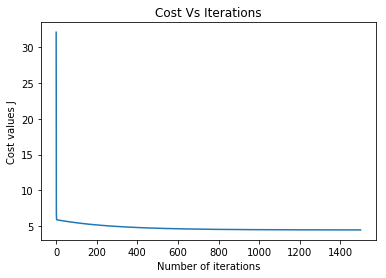

In [48]:
# Visualizing Cost function
plt.plot(j_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost values J')
plt.title('Cost Vs Iterations')
plt.show()

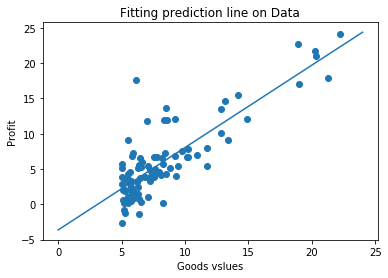

In [81]:
# Graph with best fit line on data
plt.scatter(df[0], df[1])
X_values = [X for X in range(25)]
y_values = [y*theta_final[1]+theta_final[0] for y in X_values]
plt.plot(X_values, y_values)
plt.xlabel('Goods vslues')
plt.ylabel('Profit')
plt.title('Fitting prediction line on Data')
plt.show()
